In [ ]:
import numpy as np
import timeit
import time
from random import randint
from time import perf_counter
import sys
import numpy as geek
from tqdm.notebook import tqdm
sys.setrecursionlimit(100000)
tamanho = 10000
time_bubble = []
time_select = []
time_inserction = []
time_quick = []
time_merge = []
ex = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]

In [ ]:

def merge(A, aux, low, mid, high): 
    k = low
    i = low
    j = mid + 1
 
    while i <= mid and j <= high:
 
        if A[i] <= A[j]:
            aux[k] = A[i]
            k = k + 1
            i = i + 1
        else:
            aux[k] = A[j]
            k = k + 1
            j = j + 1
 
    while i <= mid:
        aux[k] = A[i]
        k = k + 1
        i = i + 1
 
    for i in range(low, high + 1):
        A[i] = aux[i]
 
 
def mergesort(A, aux, low, high):
    if high == low:
        return

    mid = (high + low)//2

    mergesort(A, aux, low, mid)         
    mergesort(A, aux, mid + 1, high)   
 
    merge(A, aux, low, mid, high)   


In [ ]:
def partition(array, low, high):
  pivot = array[high]

  index = low - 1
  for j in range(low, high):
    if array[j] <= pivot:
      index +=1

      (array[index], array[j]) = (array[j], array[index])
      (array[index + 1], array[high]) = (array[high], array[index + 1])
  return index + 1
def quickSort(array, low, high):
  if low < high:
    pi = partition(array, low, high)
    quickSort(array, low, pi - 1)
    quickSort(array, pi + 1, high)


In [ ]:
def select(array):
    for index in range(0, len(array)):
        min_index = index

        for j in range(index + 1, len(array)):
            if array[j] < array[min_index]:
                min_index = j

        
        array[index], array[min_index] = array[min_index], array[index]

In [ ]:
def inserction(array):
  for index in range(0, len(array)):
    key = array[index]
    j = index - 1
    while j>=0 and key<array[j]:
      array[j + 1] = array[j]
      j -= 1
    array[j + 1] = key 

In [ ]:
def bubble(array):
  aux = True
  while aux is not False:
    aux = False
    for i in range(len(array)-1):
           if array[i]>array[i+1]:
               aux = True
               a = array[i]
               array[i] = array[i+1]
               array[i+1] = a

In [ ]:
for i in range(0,10):
  x = np.random.randint(1,100000,tamanho)
  y = np.copy(x)
  z = np.copy(x)
  w = np.copy(x)
  a = np.copy(x)
#quick caso  
  start_time = perf_counter()
  quickSort(x, 0, len(x)-1)
  end_time = perf_counter()
  time_quick.append(end_time-start_time)
#select caso
  start_time_2 = perf_counter()
  select(y)
  end_time_2 = perf_counter()
  time_select.append(end_time_2-start_time_2)
#inserction caso
  start_time_3 = perf_counter()
  inserction(z)
  end_time_3 = perf_counter()
  time_inserction.append(end_time_3-start_time_3)
#inserction caso
  start_time_4 = perf_counter()
  bubble(w)
  end_time_4 = perf_counter()
  time_bubble.append(end_time_4-start_time_4)
#merge
  aux = a.copy()
  start_time_5 = perf_counter()
  mergesort(a, aux, 0, len(a) - 1)
  end_time_5 = perf_counter()
  time_merge.append(end_time_5-start_time_5)
  tamanho+=10000

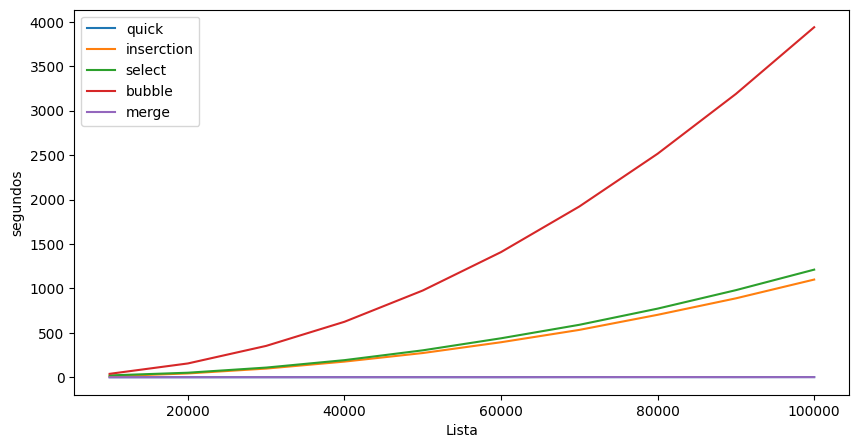

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.figure(figsize=(10,5))
plt.plot(ex,time_quick, label='quick')
plt.plot(ex,time_inserction, label='inserction')
plt.plot(ex,time_select, label='select')
plt.plot(ex,time_bubble, label='bubble')
plt.plot(ex,time_merge, label='merge')
plt.legend(loc='upper left')
plt.ylabel('segundos')
plt.xlabel('Lista')
plt.show()